In [1]:
import numpy as np
import pandas as pd
import polars as pl

In [2]:
import plotly.express as px
import seaborn as sns

In [3]:
df = pl.DataFrame(px.data.tips()).lazy()

In [4]:
df.fetch(3)

total_bill,tip,sex,smoker,day,time,size
f64,f64,str,str,str,str,i64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3


In [5]:
df.select(pl.first('smoker')).fetch(3)

smoker
str
"""No"""


In [6]:
df.groupby('sex').agg((pl.col('day') == 'Sun').sum().alias('Sunday')).collect()

sex,Sunday
str,u32
"""Female""",18
"""Male""",58


In [7]:
df.groupby('sex').agg(pl.count('day')).collect()

sex,day
str,u32
"""Female""",87
"""Male""",157


In [8]:
df.select(pl.count('sex')).collect()

sex
u32
244


In [9]:
df\
.select([
    pl.col('day').unique().count().alias('name'),
    pl.col('day').n_unique().alias('number')
])\
.collect()

name,number
u32,u32
4,4


In [10]:
import altair as alt

In [11]:
data = df\
.groupby(['day', 'sex'])\
.agg([pl.mean('total_bill').alias('average bill'),
    pl.mean('tip').alias('average tip')])\
.sort('average tip', reverse = True)\
.collect()\
.to_pandas()

alt\
.Chart(data)\
.mark_point(size=10)\
.encode(x = 'day', y = 'averge tip:Q')\
.interactive()

alt.Chart(...)

<AxesSubplot: xlabel='day'>

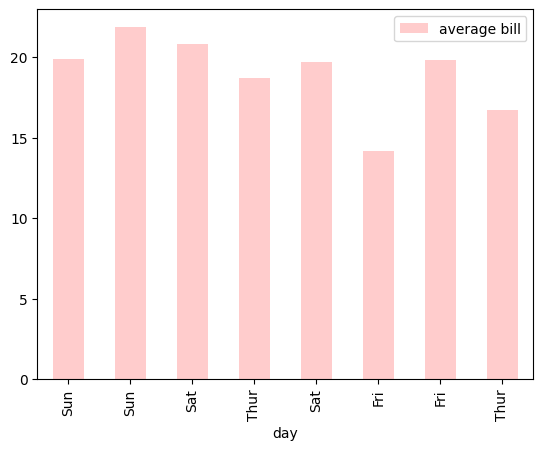

In [21]:
df\
.groupby(['day', 'sex'])\
.agg([pl.mean('total_bill').alias('average bill'),
    pl.mean('tip').alias('average tip')])\
.sort('average tip', reverse = True)\
.collect()\
.to_pandas()\
.plot(kind = 'bar', x = 'day', y = 'average bill', color = 'r', alpha = 0.2)

out = df.select(
    [
        pl.sum("random").alias("sum"),
        pl.min("random").alias("min"),
        pl.max("random").alias("max"),
        pl.col("random").max().alias("other_max"),
        pl.std("random").alias("std dev"),
        pl.var("random").alias("variance"),
    ]
)

In [28]:
df.select(
    [
        pl.col('tip').filter(pl.col('tip') >= 10).count().alias('tip > $10')
    ]
).collect()

tip > $10
u32
1


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57d5770d-d68f-47c5-bc32-65c81e0e368b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>